In [10]:
import pandas as pd
import networkx as nx
from collections import deque
import random
import matplotlib.pyplot as plt

In [12]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}
G = nx.Graph()
G.add_nodes_from(graph)
for g_item in graph:
    edges = list(map(lambda x: (g_item, x, round(random.uniform(0, 1), 2)), graph[g_item]))
    G.add_weighted_edges_from(edges)

# nx.draw(G, with_labels=True)

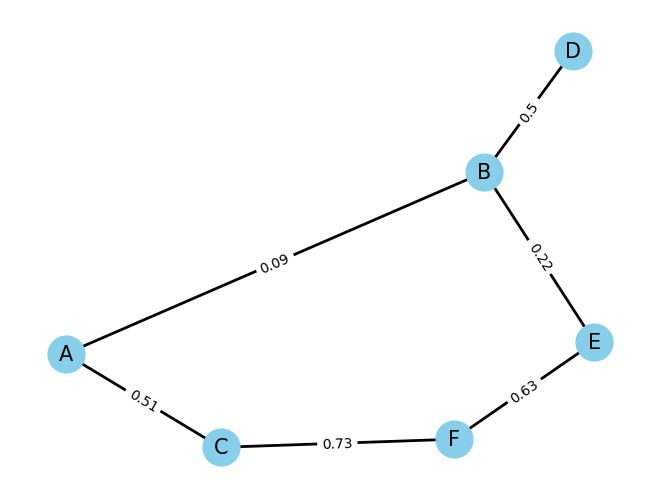

In [17]:
# Візуалізація графа
pos = nx.spring_layout(G, seed=41)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=15, width=2)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

In [23]:
def dijkstra(graph, start):
    # Ініціалізація відстаней та множини невідвіданих вершин
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    unvisited = list(graph.keys())

    while unvisited:
        # Знаходження вершини з найменшою відстанню серед невідвіданих
        current_vertex = min(unvisited, key=lambda vertex: distances[vertex])

        # Якщо поточна відстань є нескінченністю, то ми завершили роботу
        if distances[current_vertex] == float('infinity'):
            break

        for neighbor, weight in graph[current_vertex].items():
            distance = distances[current_vertex] + weight

            # Якщо нова відстань коротша, то оновлюємо найкоротший шлях
            if distance < distances[neighbor]:
                distances[neighbor] = distance

        # Видаляємо поточну вершину з множини невідвіданих
        unvisited.remove(current_vertex)

    return distances

def graph_to_adjacency_dict(graph):
    adjacency_dict = {}
    for node in graph.nodes:
        neighbors_data = {neighbor: graph[node][neighbor]['weight'] for neighbor in graph.neighbors(node)}
        adjacency_dict[node] = neighbors_data
    return adjacency_dict

adj = graph_to_adjacency_dict(G)
# Виклик функції для вершини A
print(dijkstra(adj, 'A'))

{'A': 0, 'B': 0.09, 'C': 0.51, 'D': 0.59, 'E': 0.31, 'F': 0.94}


In [24]:
# Застосування алгоритму Дейкстри
shortest_paths = nx.single_source_dijkstra_path(G, source='A')
shortest_path_lengths = nx.single_source_dijkstra_path_length(G, source='A')

print(shortest_paths)  # виведе найкоротші шляхи від вузла 'A' до всіх інших вузлів
print(shortest_path_lengths)  # виведе довжини найкоротших шляхів від вузла 'A' до всіх інших вузлів

{'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'C'], 'D': ['A', 'B', 'D'], 'E': ['A', 'B', 'E'], 'F': ['A', 'B', 'E', 'F']}
{'A': 0, 'B': 0.09, 'E': 0.31, 'C': 0.51, 'D': 0.59, 'F': 0.94}
